In [118]:
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import statistics as st
from scipy import stats
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense, Dropout, Bidirectional, LSTM
from tensorflow.python.keras import regularizers
from sklearn.model_selection import TimeSeriesSplit

#import sys
#!{sys.executable} -m pip install keras-rectified-adam

# Import custom functions
from preprocessing import *
from model import *
from evaluation import *

In [113]:
# List of X_files
X_files = ['TrainingData/subject_001_01__x.csv', 'TrainingData/subject_001_02__x.csv', 
           'TrainingData/subject_001_03__x.csv', 'TrainingData/subject_001_04__x.csv', 
           'TrainingData/subject_001_05__x.csv', 'TrainingData/subject_001_06__x.csv', 
           'TrainingData/subject_001_07__x.csv', 'TrainingData/subject_001_08__x.csv',
           'TrainingData/subject_002_01__x.csv', 'TrainingData/subject_002_02__x.csv',
           'TrainingData/subject_002_03__x.csv', 'TrainingData/subject_002_04__x.csv', 
           'TrainingData/subject_002_05__x.csv', 'TrainingData/subject_003_01__x.csv', 
           'TrainingData/subject_003_02__x.csv', 'TrainingData/subject_003_03__x.csv', 
           'TrainingData/subject_004_01__x.csv', 'TrainingData/subject_004_02__x.csv', 
           'TrainingData/subject_005_01__x.csv', 'TrainingData/subject_005_02__x.csv', 
           'TrainingData/subject_005_03__x.csv', 'TrainingData/subject_006_01__x.csv', 
           'TrainingData/subject_006_02__x.csv', 'TrainingData/subject_006_03__x.csv', 
           'TrainingData/subject_007_01__x.csv', 'TrainingData/subject_007_02__x.csv', 
           'TrainingData/subject_007_03__x.csv', 'TrainingData/subject_007_04__x.csv',
           'TrainingData/subject_008_01__x.csv']

# List of X_t_files
X_t_files = ['TrainingData/subject_001_01__x_time.csv', 'TrainingData/subject_001_02__x_time.csv', 
             'TrainingData/subject_001_03__x_time.csv', 'TrainingData/subject_001_04__x_time.csv', 
             'TrainingData/subject_001_05__x_time.csv', 'TrainingData/subject_001_06__x_time.csv', 
             'TrainingData/subject_001_07__x_time.csv', 'TrainingData/subject_001_08__x_time.csv',
             'TrainingData/subject_002_01__x_time.csv', 'TrainingData/subject_002_02__x_time.csv',
             'TrainingData/subject_002_03__x_time.csv', 'TrainingData/subject_002_04__x_time.csv', 
             'TrainingData/subject_002_05__x_time.csv', 'TrainingData/subject_003_01__x_time.csv', 
             'TrainingData/subject_003_02__x_time.csv', 'TrainingData/subject_003_03__x_time.csv',
             'TrainingData/subject_004_01__x_time.csv', 'TrainingData/subject_004_02__x_time.csv', 
             'TrainingData/subject_005_01__x_time.csv', 'TrainingData/subject_005_02__x_time.csv', 
             'TrainingData/subject_005_03__x_time.csv', 'TrainingData/subject_006_01__x_time.csv', 
             'TrainingData/subject_006_02__x_time.csv', 'TrainingData/subject_006_03__x_time.csv', 
             'TrainingData/subject_007_01__x_time.csv', 'TrainingData/subject_007_02__x_time.csv', 
             'TrainingData/subject_007_03__x_time.csv', 'TrainingData/subject_007_04__x_time.csv', 
             'TrainingData/subject_008_01__x_time.csv']

# List of training y_files
y_files = ['TrainingData/subject_001_01__y.csv', 'TrainingData/subject_001_02__y.csv', 
           'TrainingData/subject_001_03__y.csv', 'TrainingData/subject_001_04__y.csv', 
           'TrainingData/subject_001_05__y.csv', 'TrainingData/subject_001_06__y.csv', 
           'TrainingData/subject_001_07__y.csv', 'TrainingData/subject_001_08__y.csv',
           'TrainingData/subject_002_01__y.csv', 'TrainingData/subject_002_02__y.csv',
           'TrainingData/subject_002_03__y.csv', 'TrainingData/subject_002_04__y.csv', 
           'TrainingData/subject_002_05__y.csv', 'TrainingData/subject_003_01__y.csv', 
           'TrainingData/subject_003_02__y.csv', 'TrainingData/subject_003_03__y.csv', 
           'TrainingData/subject_004_01__y.csv', 'TrainingData/subject_004_02__y.csv', 
           'TrainingData/subject_005_01__y.csv', 'TrainingData/subject_005_02__y.csv', 
           'TrainingData/subject_005_03__y.csv', 'TrainingData/subject_006_01__y.csv', 
           'TrainingData/subject_006_02__y.csv', 'TrainingData/subject_006_03__y.csv', 
           'TrainingData/subject_007_01__y.csv', 'TrainingData/subject_007_02__y.csv', 
           'TrainingData/subject_007_03__y.csv', 'TrainingData/subject_007_04__y.csv',
           'TrainingData/subject_008_01__y.csv']

# List of training y_t_files
y_t_files = ['TrainingData/subject_001_01__y_time.csv', 'TrainingData/subject_001_02__y_time.csv', 
             'TrainingData/subject_001_03__y_time.csv', 'TrainingData/subject_001_04__y_time.csv', 
             'TrainingData/subject_001_05__y_time.csv', 'TrainingData/subject_001_06__y_time.csv', 
             'TrainingData/subject_001_07__y_time.csv', 'TrainingData/subject_001_08__y_time.csv',
             'TrainingData/subject_002_01__y_time.csv', 'TrainingData/subject_002_02__y_time.csv',
             'TrainingData/subject_002_03__y_time.csv', 'TrainingData/subject_002_04__y_time.csv', 
             'TrainingData/subject_002_05__y_time.csv', 'TrainingData/subject_003_01__y_time.csv', 
             'TrainingData/subject_003_02__y_time.csv', 'TrainingData/subject_003_03__y_time.csv',
             'TrainingData/subject_004_01__y_time.csv', 'TrainingData/subject_004_02__y_time.csv', 
             'TrainingData/subject_005_01__y_time.csv', 'TrainingData/subject_005_02__y_time.csv', 
             'TrainingData/subject_005_03__y_time.csv', 'TrainingData/subject_006_01__y_time.csv', 
             'TrainingData/subject_006_02__y_time.csv', 'TrainingData/subject_006_03__y_time.csv', 
             'TrainingData/subject_007_01__y_time.csv', 'TrainingData/subject_007_02__y_time.csv', 
             'TrainingData/subject_007_03__y_time.csv', 'TrainingData/subject_007_04__y_time.csv', 
             'TrainingData/subject_008_01__y_time.csv']

training_X, training_y = generate_data(X_files, X_t_files, y_files, y_t_files)
print(training_X.shape, training_y.shape)

(334543, 30, 6) (334543, 1)


In [114]:
# Save the training data to .npy files so we do not have to generate them repeatedly
np.save('training_X.npy', training_X)
np.save('training_y.npy', training_y)

In [115]:
# Loading the data back
training_X = np.load('training_X.npy')
training_y = np.load('training_y.npy')

In [116]:
# Get the class weights
label_weights = get_label_weights(training_X, training_y)
print(label_weights)
# Perform one-hot encoding
training_y_encoded = one_hot_encoding(training_y)

{0: 0.332789863001707, 1: 6.142009987515605, 2: 4.600173257796601, 3: 1.6262687640973787}


/usr/local/Cellar/jupyterlab/3.0.9/libexec/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass classes=[0 1 2 3], y=[0 0 0 ... 0 0 0] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [117]:
n_timesteps, n_features, n_outputs = training_X.shape[1], training_X.shape[2], training_y_encoded.shape[1]
model = Sequential()
model.add(Bidirectional(LSTM(units = 125, kernel_regularizer = regularizers.l1_l2(l1 = 2**-6, l2 = 2**-8)),
                        input_shape = (n_timesteps, n_features)))
model.add(Dropout(rate = 0.3))
model.add(Dense(units = 125, activation = 'tanh'))
model.add(Dense(n_outputs, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', 
              metrics = ['acc', f1, precision_measure, recall_measure])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_2 (Bidirection (None, 250)               132000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 250)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 125)               31375     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 504       
Total params: 163,879
Trainable params: 163,879
Non-trainable params: 0
_________________________________________________________________


In [121]:
history = [] # Placeholder
tscv = TimeSeriesSplit()
for train_index, test_index in tscv.split(training_X):
    X_train, X_test = training_X[train_index], training_X[test_index]
    y_train, y_test = training_y_encoded[train_index], training_y_encoded[test_index]
    history = model.fit(X_train, y_train, epochs = 15, batch_size = 128, class_weight = label_weights, 
                        validation_data = (X_test, y_test), shuffle = False)

Train on 55758 samples, validate on 55757 samples
Epoch 1/15
55758/55758 [==============================] - 86s 2ms/step - loss: 1.6791 - acc: 0.4016 - f1: 0.1734 - precision_measure: 0.3369 - recall_measure: 0.1409 - val_loss: 2.1022 - val_acc: 0.2475 - val_f1: 0.1858 - val_precision_measure: 0.2122 - val_recall_measure: 0.1680
Epoch 2/15
55758/55758 [==============================] - 72s 1ms/step - loss: 1.0081 - acc: 0.4945 - f1: 0.3551 - precision_measure: 0.4883 - recall_measure: 0.3008 - val_loss: 1.6940 - val_acc: 0.5013 - val_f1: 0.4523 - val_precision_measure: 0.5048 - val_recall_measure: 0.4145
Epoch 3/15
55758/55758 [==============================] - 75s 1ms/step - loss: 0.6313 - acc: 0.5813 - f1: 0.4957 - precision_measure: 0.5859 - recall_measure: 0.4460 - val_loss: 1.8221 - val_acc: 0.5520 - val_f1: 0.5173 - val_precision_measure: 0.5527 - val_recall_measure: 0.4906
Epoch 4/15
55758/55758 [==============================] - 76s 1ms/step - loss: 0.4983 - acc: 0.5814 - f1: 0

Epoch 15/15
111515/111515 [==============================] - 123s 1ms/step - loss: 0.1905 - acc: 0.8556 - f1: 0.8547 - precision_measure: 0.8563 - recall_measure: 0.8532 - val_loss: 0.7954 - val_acc: 0.6334 - val_f1: 0.6318 - val_precision_measure: 0.6344 - val_recall_measure: 0.6293
Train on 167272 samples, validate on 55757 samples
Epoch 1/15
167272/167272 [==============================] - 179s 1ms/step - loss: 0.3256 - acc: 0.7753 - f1: 0.7736 - precision_measure: 0.7762 - recall_measure: 0.7711 - val_loss: 0.8120 - val_acc: 0.5763 - val_f1: 0.5746 - val_precision_measure: 0.5773 - val_recall_measure: 0.5719
Epoch 2/15
167272/167272 [==============================] - 182s 1ms/step - loss: 0.2887 - acc: 0.7683 - f1: 0.7666 - precision_measure: 0.7694 - recall_measure: 0.7640 - val_loss: 0.5908 - val_acc: 0.6734 - val_f1: 0.6696 - val_precision_measure: 0.6758 - val_recall_measure: 0.6636
Epoch 3/15
167272/167272 [==============================] - 180s 1ms/step - loss: 0.2662 - acc: 

223029/223029 [==============================] - 248s 1ms/step - loss: 0.0470 - acc: 0.9738 - f1: 0.9738 - precision_measure: 0.9739 - recall_measure: 0.9736 - val_loss: 0.4856 - val_acc: 0.9049 - val_f1: 0.9049 - val_precision_measure: 0.9049 - val_recall_measure: 0.9049
Epoch 14/15
223029/223029 [==============================] - 245s 1ms/step - loss: 0.0466 - acc: 0.9743 - f1: 0.9743 - precision_measure: 0.9744 - recall_measure: 0.9742 - val_loss: 0.4649 - val_acc: 0.8972 - val_f1: 0.8972 - val_precision_measure: 0.8972 - val_recall_measure: 0.8971
Epoch 15/15
223029/223029 [==============================] - 244s 1ms/step - loss: 0.0459 - acc: 0.9751 - f1: 0.9751 - precision_measure: 0.9752 - recall_measure: 0.9751 - val_loss: 0.5503 - val_acc: 0.8979 - val_f1: 0.8978 - val_precision_measure: 0.8979 - val_recall_measure: 0.8978
Train on 278786 samples, validate on 55757 samples
Epoch 1/15
278786/278786 [==============================] - 314s 1ms/step - loss: 0.0955 - acc: 0.9513 - f

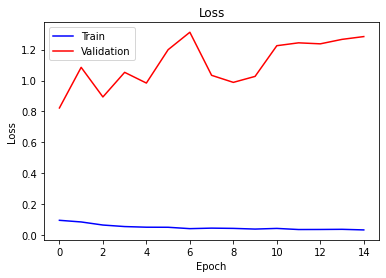

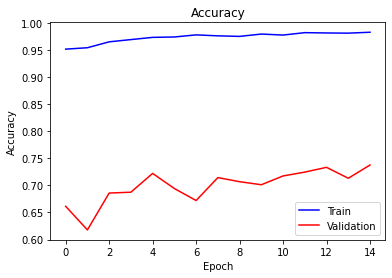

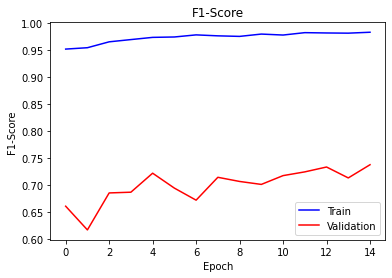

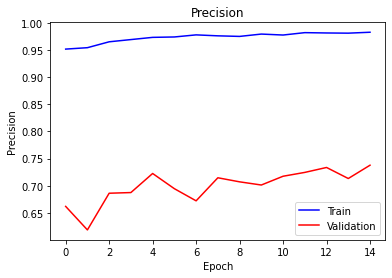

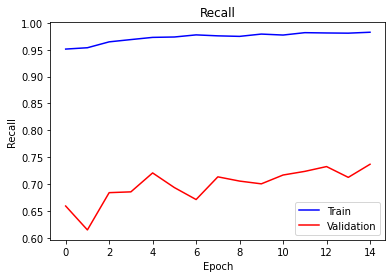

In [122]:
plot_history(history)

In [9]:
# Get prediction report
y_pred = model.predict(X_test, batch_size = 64, verbose = 1)
y_pred_bool = np.argmax(y_pred, axis = 1)
print(classification_report(y_test, y_pred_bool))

20716/20716 [==============================] - 11s 532us/step
              precision    recall  f1-score   support

           0       0.96      0.82      0.89     15600
           1       0.77      0.99      0.87       784
           2       0.90      0.99      0.94      1146
           3       0.52      0.83      0.64      3186

    accuracy                           0.84     20716
   macro avg       0.79      0.91      0.83     20716
weighted avg       0.88      0.84      0.85     20716



In [10]:
validation = pd.DataFrame({'Y':val_y.flatten(), 'Prediction':y_pred_bool})
validation = pd.DataFrame(list(zip(val_y.flatten(), y_pred_bool)), columns = ['Y', 'Prediction'])
validation.to_csv('validation_prediction.csv')

In [123]:
# Get predictions using test data
test_files = ['TestData/subject_009_01__x.csv', 'TestData/subject_010_01__x.csv', 
              'TestData/subject_011_01__x.csv', 'TestData/subject_012_01__x.csv']

test_time_files = ['TestData/subject_009_01__x_time.csv', 'TestData/subject_010_01__x_time.csv', 
              'TestData/subject_011_01__x_time.csv', 'TestData/subject_012_01__x_time.csv']

y_files = ['TestData/subject_009_01__y_time.csv', 'TestData/subject_010_01__y_time.csv',
           'TestData/subject_011_01__y_time.csv', 'TestData/subject_012_01__y_time.csv']

prediction_files = ['subject_009_01__y_prediction.csv', 'subject_010_01__y_prediction.csv',
                    'subject_011_01__y_prediction.csv', 'subject_012_01__y_prediction.csv']

In [124]:
def create_dataset(X, time_steps, step):
    X_values = []
    for i in range(0, len(X) - time_steps, step):
        value = X.iloc[i:(i + time_steps)].values
        X_values.append(value)        
    return np.array(X_values)

def get_majority(y):
    y_out = []
    for i in range(0, y.shape[0], 4):
        a = list(y[i:i+4])
        y_out.append(max(a, key = a.count))
    return np.array(y_out)

for i in range(len(test_files)):
    input_data = create_dataframe_X(test_files[i], test_time_files[i])
    df = input_data.drop(['Time stamp'], axis = 1)
    y_frame = pd.read_csv(y_files[i])
    addl = y_frame.shape[0] * 4 - df.shape[0] + 30
    addl_df = pd.DataFrame(df.iloc[-addl:])
    df = df.append(to_add_df)
    X_test = create_dataset(df, 30, 1)
    y_test = model.predict(X_test, batch_size = 64, verbose = 1)
    y_test_bool = np.argmax(y_test, axis = 1)
    y_actual = get_majority(y_test_bool)
    print(y_actual.size)
    y_series = pd.Series(y_actual)
    y_series.to_csv("C2_predictions/" + prediction_files[i])

37988/37988 [==============================] - 29s 758us/step
9497
49078/49078 [==============================] - 21s 435us/step
12270
51758/51758 [==============================] - 17s 324us/step
12940
45316/45316 [==============================] - 15s 328us/step
11329
